<a href="https://colab.research.google.com/github/netalasawa221/DA_LAB/blob/main/DA_Expt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Installing Required Libraries


In [2]:
!pip install seaborn
!pip install numpy
!pip install pandas
!pip install plotly

Importing Required Libraries

In [86]:
import seaborn as sns
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

Importing The dataset

In [87]:
path = "/content/sample_data/December_MyCall_2022.csv"
df = pd.read_csv(path)
df.head()

,operator,inout_travelling,network_type,rating,calldrop_category,latitude,longitude,state_name
0,VI,Indoor,4G,1,Poor Voice Quality,-1.000000,-1.000000,NA
1,VI,Indoor,4G,1,Poor Voice Quality,-1.000000,-1.000000,NA
2,VI,Indoor,4G,3,Satisfactory,-1.000000,-1.000000,NA
3,RJio,Indoor,4G,3,Satisfactory,21.864920,73.690145,Gujarat
4,RJio,Indoor,4G,4,Satisfactory,20.718445,77.009971,Maharashtra


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804 entries, 0 to 1803
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   operator           1804 non-null   object 
 1   inout_travelling   1804 non-null   object 
 2   network_type       1804 non-null   object 
 3   rating             1804 non-null   int64  
 4   calldrop_category  1804 non-null   object 
 5   latitude           1804 non-null   float64
 6   longitude          1804 non-null   float64
 7   state_name         1804 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 112.9+ KB


Checking NULL value Attributes

In [89]:
df.isnull().sum() 

operator             0
inout_travelling     0
network_type         0
rating               0
calldrop_category    0
latitude             0
longitude            0
state_name           0
dtype: int64

Checking For Duplicated Rows

In [90]:
df.duplicated().sum()

1071

Droping Duplicated Rows

In [91]:
df=df.drop_duplicates(subset=['operator','inout_travelling','network_type','rating','calldrop_category','latitude','longitude','state_name'])

Checking the dataset after cleaning

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733 entries, 0 to 1802
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   operator           733 non-null    object 
 1   inout_travelling   733 non-null    object 
 2   network_type       733 non-null    object 
 3   rating             733 non-null    int64  
 4   calldrop_category  733 non-null    object 
 5   latitude           733 non-null    float64
 6   longitude          733 non-null    float64
 7   state_name         733 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 51.5+ KB


In [93]:
df.head()

,operator,inout_travelling,network_type,rating,calldrop_category,latitude,longitude,state_name
0,VI,Indoor,4G,1,Poor Voice Quality,-1.000000,-1.000000,NA
2,VI,Indoor,4G,3,Satisfactory,-1.000000,-1.000000,NA
3,RJio,Indoor,4G,3,Satisfactory,21.864920,73.690145,Gujarat
4,RJio,Indoor,4G,4,Satisfactory,20.718445,77.009971,Maharashtra
5,VI,Indoor,4G,5,Satisfactory,23.222229,81.552772,Madhya Pradesh


Visualizing Data

Bar graph 


INOUT_Travelling

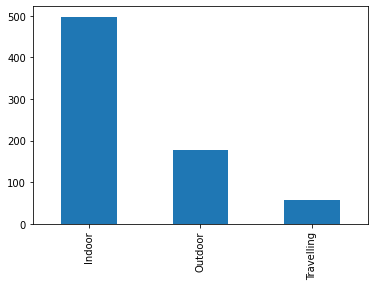

In [94]:
df['inout_travelling'].value_counts().plot.bar()

Ratings

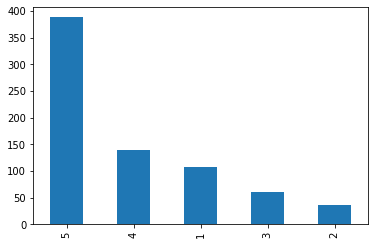

In [95]:
df['rating'].value_counts().plot.bar()

State_Name

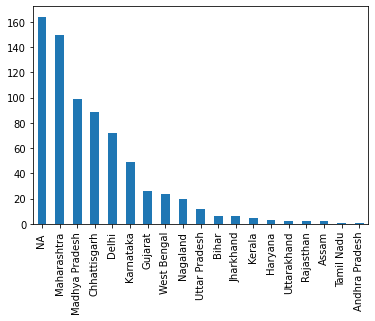

In [96]:
df['state_name'].value_counts().plot.bar()

Operator

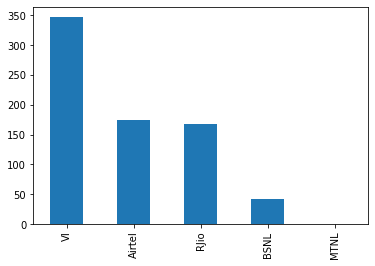

In [97]:
df['operator'].value_counts().plot.bar()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


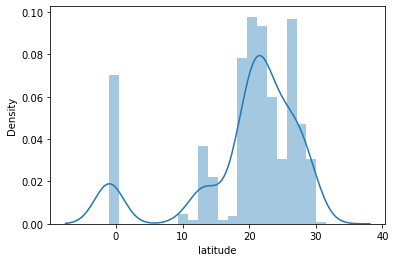

In [98]:
sns.distplot(df['latitude']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


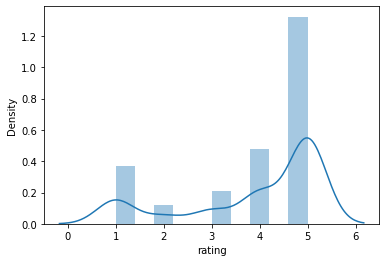

In [99]:
sns.distplot(df['rating']);

,rating,latitude,longitude
rating,1.000000,0.196734,0.200940
latitude,0.196734,1.000000,0.871702
longitude,0.200940,0.871702,1.000000


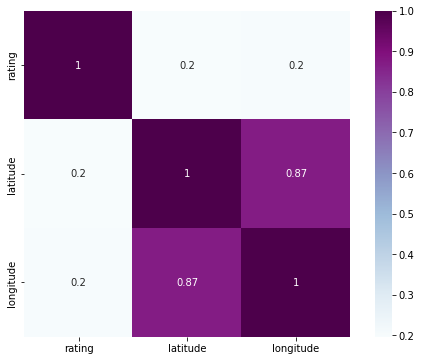

In [100]:
matrix = df.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=1, square=True, cmap="BuPu", annot=True)

matrix

In [101]:
print(' Invalid Longitudes:', df.loc[df['longitude']>-1]['longitude'].count())
print(' Invalid Latitudes:', df.loc[df['latitude']<1]['latitude'].count())

 Invalid Longitudes: 657
 Invalid Latitudes: 76


In [102]:
df.loc[df["longitude"] <= -1 , "longitude"] = float("nan")
df.loc[df["latitude"] <= -1 , "latitude"] = float("nan")

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733 entries, 0 to 1802
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   operator           733 non-null    object 
 1   inout_travelling   733 non-null    object 
 2   network_type       733 non-null    object 
 3   rating             733 non-null    int64  
 4   calldrop_category  733 non-null    object 
 5   latitude           657 non-null    float64
 6   longitude          657 non-null    float64
 7   state_name         733 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 51.5+ KB


In [104]:
df.head()

,operator,inout_travelling,network_type,rating,calldrop_category,latitude,longitude,state_name
0,VI,Indoor,4G,1,Poor Voice Quality,NaN,NaN,NA
2,VI,Indoor,4G,3,Satisfactory,NaN,NaN,NA
3,RJio,Indoor,4G,3,Satisfactory,21.864920,73.690145,Gujarat
4,RJio,Indoor,4G,4,Satisfactory,20.718445,77.009971,Maharashtra
5,VI,Indoor,4G,5,Satisfactory,23.222229,81.552772,Madhya Pradesh


Conclusion:
Dataset Initially had 1804 enteries.
It didn't have any null enteries.
It had duplicate enteries so, we removed them all.
VI company had most of the calls.
Maharshtra state had highest number of calls.
Most of the calls were from indoor.
Most of the calls has 5 rating.